In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np
import os
from tqdm import notebook

In [2]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

def randargmax(b, **kw):
  """ a random tie-breaking argmax"""
  return np.argmax(np.random.random(b.shape) * (b==b.max()), **kw)

In [3]:
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)

In [4]:
with open('/Users/alexanderhsu/Google Drive/My Drive/MABe_Competition/data/active_learning_fixed_wpredictions.sav', 'rb') as fr:
    [X_train_list, Y_train_list, predictions_list,
     iterX_f1_scores_list, iterX_macro_scores_list, iterX_predict_prob_list,
     sampled_idx_list] = joblib.load(fr)

In [6]:
path = '/Users/alexanderhsu/Google Drive/My Drive/MABe_Competition/CalMS21_DEG_test'
filenames = find_csv_filenames(path)
filenames = np.sort(filenames)
dfs = []
labels_all_deg_seed = []
seeds = np.arange(2023, 2043)
for seed in notebook.tqdm(seeds):
    labels_all_deg = []
    for i, filename in enumerate(filenames):
        df = pd.read_csv(os.path.join(path, filename),
                         low_memory=False)
        np.random.seed(seed)
        label_vec = randargmax(np.array(df.iloc[:, 1:]),
                               axis=1)
        labels_all_deg.append(label_vec)
    labels_all_deg_seed.append(np.hstack(labels_all_deg))

  0%|          | 0/20 [00:00<?, ?it/s]

In [7]:
path = '/Users/alexanderhsu/Google Drive/My Drive/MABe_Competition/calms21_test_simba_labels/'
filenames = find_csv_filenames(path)
filenames = np.sort(filenames)
dfs = []
labels_all_simba_seed = []
seeds = np.arange(2023, 2043)
for seed in notebook.tqdm(seeds):
    labels_all_simba = []
    for i, filename in enumerate(filenames):
        df = pd.read_csv(os.path.join(path, filename),
                         low_memory=False)
        np.random.seed(seed)
        label_vec_raw = np.array(df.iloc[:, 1:])
        idx_null = np.where(np.max(label_vec_raw, axis=1)==0)[0]
        label_vec = randargmax(label_vec_raw,
                               axis=1)
        label_vec[idx_null] = 3
        labels_all_simba.append(label_vec)
    labels_all_simba_seed.append(np.hstack(labels_all_simba))

  0%|          | 0/20 [00:00<?, ?it/s]

In [8]:
path = '/Users/alexanderhsu/Google Drive/My Drive/MABe_Competition/calms21_test_simba_prob/'
filenames = find_csv_filenames(path)
filenames = np.sort(filenames)
dfs = []
labels_all_simba_seed2 = []
seeds = np.arange(2023, 2043)
for seed in notebook.tqdm(seeds):
    labels_all_simba = []
    for i, filename in enumerate(filenames):
        df = pd.read_csv(os.path.join(path, filename),
                         low_memory=False)
        np.random.seed(seed)
        label_vec_raw = np.array(df.iloc[:, 1:])
        label_vec = np.argmax(label_vec_raw,
                              axis=1)
        labels_all_simba.append(label_vec)
    labels_all_simba_seed2.append(np.hstack(labels_all_simba))

  0%|          | 0/20 [00:00<?, ?it/s]

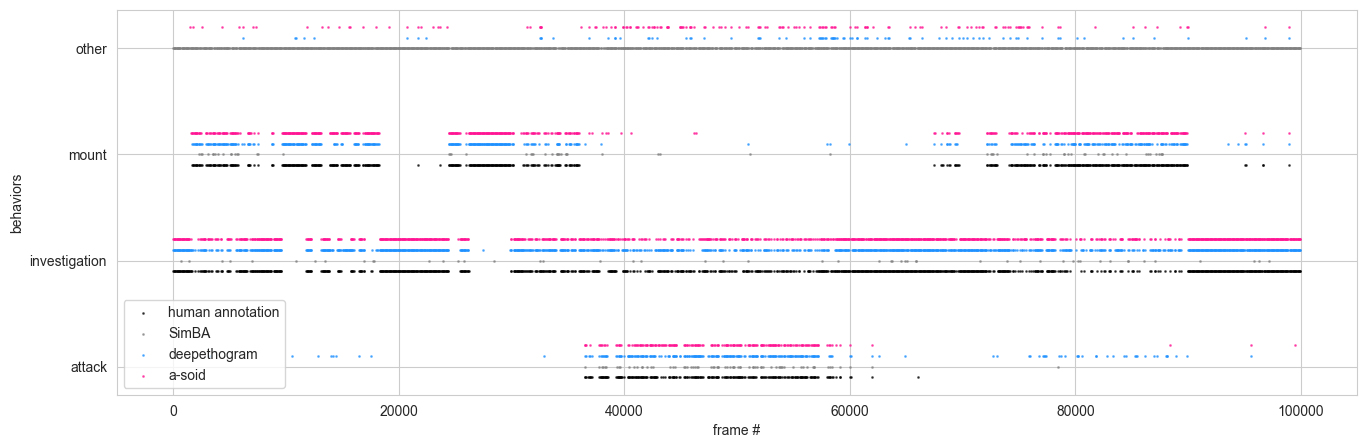

In [9]:
rows = 1
cols = 1
step = 50
seed_2_test = 9
behavioral_types = ['attack', 'investigation', 'mount', 'other']
fig, ax = plt.subplots(rows, cols, figsize=(16, 5))
ax.scatter(np.arange(0, 100000, step),
           targets_test[(targets_test<3)][:100000:step]-.1,
           s=1, c='k', alpha=0.6, label='human annotation')

ax.scatter(np.arange(0, 100000, step),
           labels_all_simba_seed[seed_2_test][(targets_test<3)][:100000:step],
           s=1, c='gray', alpha=0.6, label='SimBA')

ax.scatter(np.arange(0, 100000, step),
           labels_all_deg_seed[seed_2_test][(targets_test<3)][:100000:step]+.1,
           s=1, c='dodgerblue', alpha=0.6, label='deepethogram')

ax.scatter(np.arange(0, 100000, step),
           predictions_list[-1][seed_2_test][(targets_test<3)][:100000:step]+.2,
           s=1, c='deeppink', alpha=0.6, label='a-soid')

ax.legend()
ax.set_ylabel('behaviors')
ax.set_yticks(np.arange(4))
ax.set_yticklabels(behavioral_types)
ax.set_xlabel('frame #')
plt.show()
# fig.savefig(r'F:\My Drive\manuscript_figures\asoid/additional/ethogram_diff.svg')

## plotting predictions removing 'other'

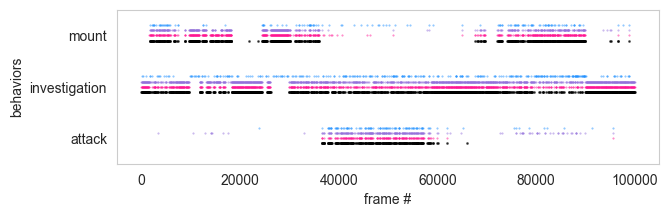

In [10]:
rows = 1
cols = 1
step = 50
seed_2_test = 1
behavioral_types = ['attack', 'investigation', 'mount', 'other']
fig, ax = plt.subplots(rows, cols, figsize=(7, 2))
ax.scatter(np.arange(0, 100000, step), targets_test[(targets_test<3)][:100000:step]-.1,
              s=1, c='k', alpha=0.6, label='human annotation')

ax.scatter(np.arange(0, 100000, step),
           labels_all_simba_seed2[seed_2_test][(targets_test<3)][:100000:step]+.2,
           s=0.2, c='dodgerblue', alpha=0.6, label='SimBA')

ax.scatter(np.arange(0, 100000, step),
           labels_all_deg_seed[seed_2_test][(targets_test<3)][:100000:step]+.1,
           s=0.2, c='mediumpurple', alpha=0.6, label='deepethogram')

ax.scatter(np.arange(0, 100000, step),
           predictions_list[-1][seed_2_test][(targets_test<3)][:100000:step],
           s=0.2, c='deeppink', alpha=0.6, label='a-soid')

# ax.legend()
ax.set_ylabel('behaviors')
ax.set_yticks(np.arange(4))
ax.set_yticklabels(behavioral_types)
ax.set_ylim([-.5, 2.5])
ax.set_xlabel('frame #')
ax.grid(False)

plt.show()
# fig.savefig('/Users/alexanderhsu/Google Drive/My Drive/manuscript_figures/asoid/additional/prediction_comparison_scatter.svg')

In [11]:
np.save('../temp/predictions_20seeds.npy', [predictions_list,
                                            labels_all_deg_seed,
                                            labels_all_simba_seed,
                                            labels_all_simba_seed2])

/opt/anaconda3/envs/asoid/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)
